In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


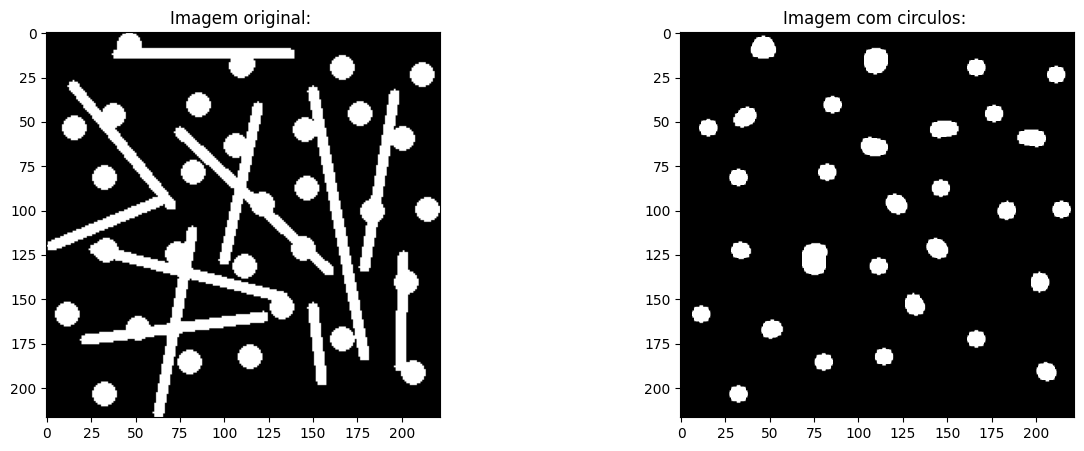

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

raio_circulo = 4
elemento_estruturante_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))



def dilatacao(img, elemEst):
    altura, largura = img.shape
    newImg = np.zeros((altura, largura))

    newImg = cv2.filter2D(img, cv2.CV_64F, elemEst)

    return newImg

def erosao(img, elemEst):
    linhas, colunas = img.shape
    nova_img = np.zeros((linhas, colunas), dtype=np.uint8)

    for i in range(linhas):
        for j in range(colunas):
            # Verificar se todos os pixels na vizinhança são brancos
            i_min, i_max = max(0, i - elemEst.shape[0] // 2), min(linhas, i + elemEst.shape[0] // 2 + 1)
            j_min, j_max = max(0, j - elemEst.shape[1] // 2), min(colunas, j + elemEst.shape[1] // 2 + 1)

            vizinhanca = img[i_min:i_max, j_min:j_max]

            if np.all(vizinhanca == 255):
                nova_img[i, j] = 255
            else:
                nova_img[i, j] = 0

    return nova_img

def abertura(img, elemEst):
    temp = (erosao(img, elemEst))
    newImg = dilatacao(temp, elemEst)

    return newImg

newImg1 = abertura(img=img1, elemEst=elemento_estruturante_circular)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1).set_title("Imagem original: ")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2).set_title("Imagem com circulos: ")
plt.imshow(newImg1, cmap='gray', vmin=0, vmax=255)


2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


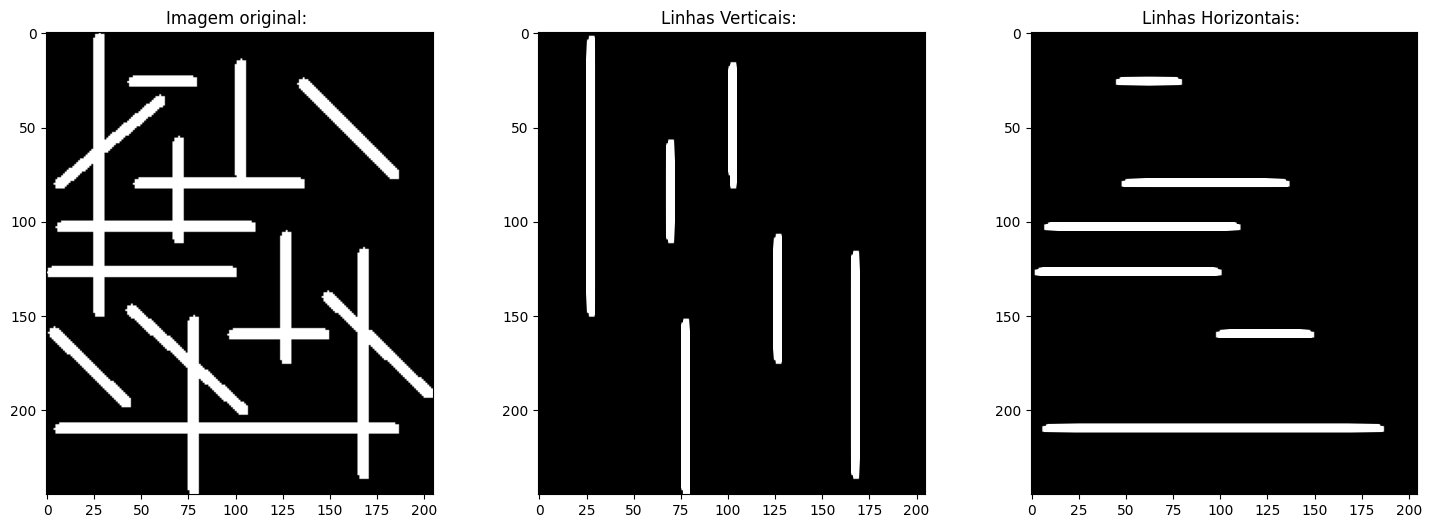

In [3]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)


#utilizando mascaras grandes para eliminar as linhas erradas
elemEstrutVertical = np.array([[0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0],
                                [0, 1, 0]])
elemEstrutHorizontal =  np.array([[0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0],
                                                                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
                                                                        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

newImgA = abertura(img2, elemEstrutVertical)

newImgB = abertura(img2, elemEstrutHorizontal)


fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1).set_title("Imagem original: ")
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 2).set_title("Linhas Verticais: ")
plt.imshow(newImgA, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 3, 3).set_title("Linhas Horizontais: ")
plt.imshow(newImgB, cmap='gray', vmin=0, vmax=255);

plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

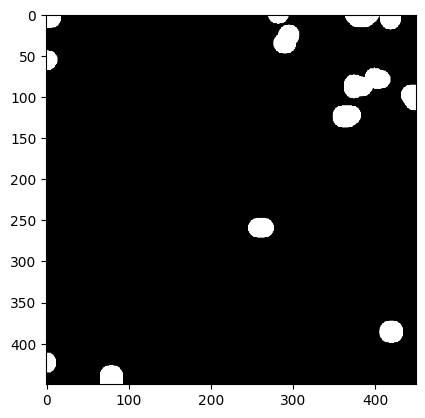

In [4]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

binaryImg = np.where(img3 > 210, 255, 0)

raio_circulo = 11
elemEstrutCircular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))


newImg = abertura(binaryImg, elemEstrutCircular) 

plt.imshow(newImg, cmap='gray', vmin=0, vmax=255);

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

A quantidade de objetos na imagem é: 93


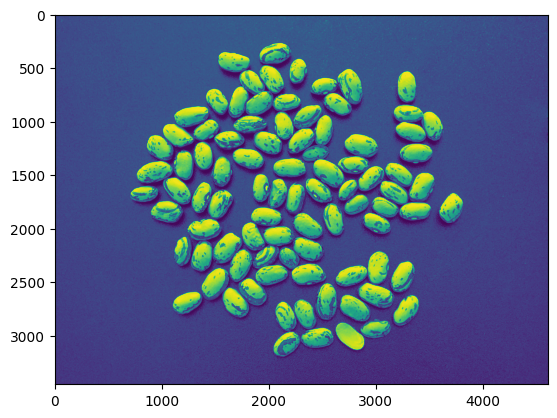

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_objetos(imagem_binaria):
    # Encontrar contornos na imagem binarizada
    contours, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por área mínima aproximada de cada feijão
    area_minima = 650  
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > area_minima]

    # Desenhar os contornos na imagem original
    imagem_contornos = cv2.drawContours(imagem.copy(), contours, -1, (0, 255, 0), 2)

    # Contar o número de objetos
    numero_de_objetos = len(contours)

    return numero_de_objetos, imagem_contornos

# Carregar a imagem em escala de cinza
imagem = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)
# Aplicar suavização antes da binarização (opcional)
imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)

# Binarizar a imagem usando Otsu
_, imagem_binaria = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Aplicar operações morfológicas (abertura) para remover detalhes indesejados
kernel = np.ones((3, 3), np.uint8)
imagem_binaria = cv2.morphologyEx(imagem_binaria, cv2.MORPH_OPEN, kernel)

# Contar objetos na imagem binarizada
quantidade_de_objetos, imagem_com_contornos = contar_objetos(imagem_binaria)

plt.imshow(imagem_com_contornos)
print(f'A quantidade de objetos na imagem é: {quantidade_de_objetos}')


5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

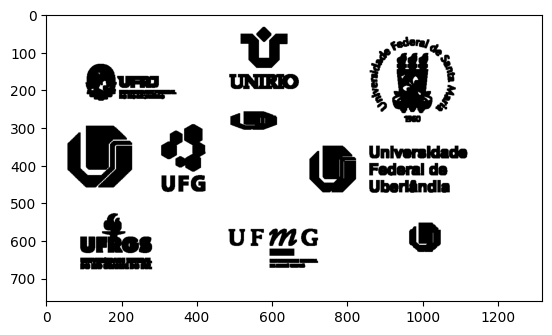

O elemento foi detectado!


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def hit_or_miss(img, forground, background):
    erosion_forground = erosao(img, forground)
    erosion_background = erosao(img, background)
    result = erosion_forground & erosion_background
    return result

# Carregar a imagem e aplicar binarização com Otsu
img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)
_, binaryImg = cv2.threshold(img5, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

ufu_logo = np.array([[0, 255, 255, 255, 0], 
                    [255, 0, 255, 255, 255],
                    [255, 0, 255, 255, 255],
                    [255, 0, 0, 0, 255],
                    [0, 255, 255, 255, 0]])

ufu_logo_background = 255 - ufu_logo  # Inverter para representar o fundo

result = hit_or_miss(binaryImg, ufu_logo, ufu_logo_background)

# Verificar se há detecção
detected = np.any(result != 0)

plt.imshow(result, cmap='gray')

plt.show()

# Imprimir o resultado
if detected:
    print("O elemento foi detectado!")
else:
    print("O elemento não foi detectado.")


6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

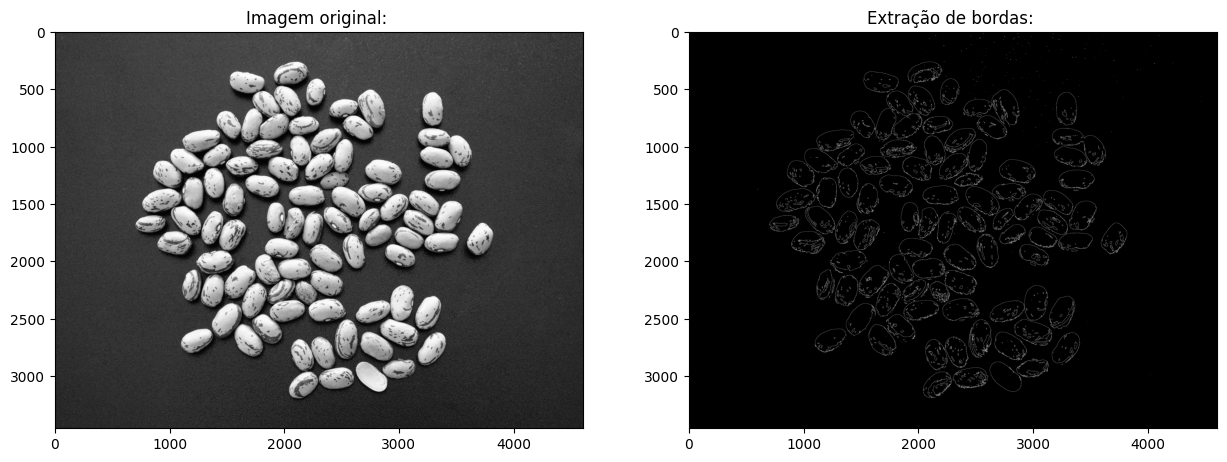

In [ ]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

#com base no ultimo lab, apliquei essa imagem no Otsu e obtive que o melhor valor de K é 123
binaryImg = np.where(img4 > 123, 255, 0)

raio_circulo = 1
elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*raio_circulo+1, 2*raio_circulo+1), (raio_circulo, raio_circulo))

def extracaoFronteiras(img):
    newImgErosao = erosao(img, elem)
    newImg = img - newImgErosao
    return newImg

newImg = extracaoFronteiras(binaryImg)
fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1).set_title("Imagem original: ")
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

plt.subplot(1, 2, 2).set_title("Extração de bordas: ")
plt.imshow(newImg, cmap='gray', vmin=0, vmax=255);